In [1]:
import bz2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from scipy.stats import norm

# Reading file

In [2]:
prm_info = np.zeros([100,6], float)

ln = 0
cl = 0

file = bz2.open("mc-data/960014.pri.bz2", "rt")#reading file with primary information

for line in file:
    tmp = line.rstrip('\n').split(' ')
    if tmp[0] != "#":
        prm_info[ln][cl] = float(tmp[2]) * -1
        for i in range(5, 10):
            cl += 1
            prm_info[ln][cl] = float(tmp[i])
        cl = 0
        ln += 1

# Plotting first interaction point

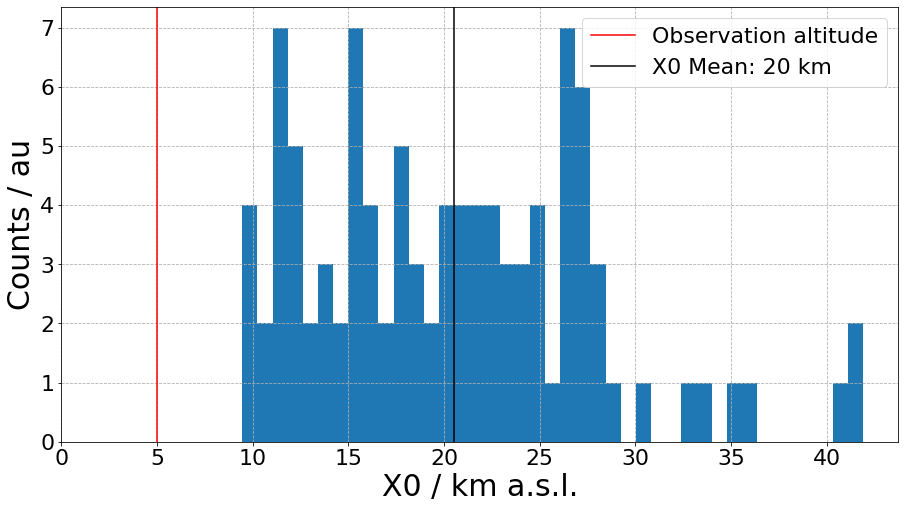

In [3]:
plt.figure(figsize=(15,8))

plt.hist(prm_info[:,0], bins=int(np.amax(prm_info[:,0])))
plt.axvline(x=5., color="r", label="Observation altitude")
plt.axvline(x=np.mean(prm_info[:,0]), color="k", label="X0 Mean: "+str(int(np.mean(prm_info[:,0])))+" km")

plt.legend(fontsize=22)

plt.xlabel("X0 / km a.s.l.", fontsize=30)
plt.ylabel("Counts / au", fontsize=30)

plt.xlim(0,)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.grid(ls='--')

plt.show()

In [4]:
sec_dist = np.zeros(5, float)
sec_name = np.array(["Photons", "el/po", "hd", "mu", "Tot"])

for i in range(2, 7):
    sec_dist[i-2] = np.mean(prm_info[:,i-1])

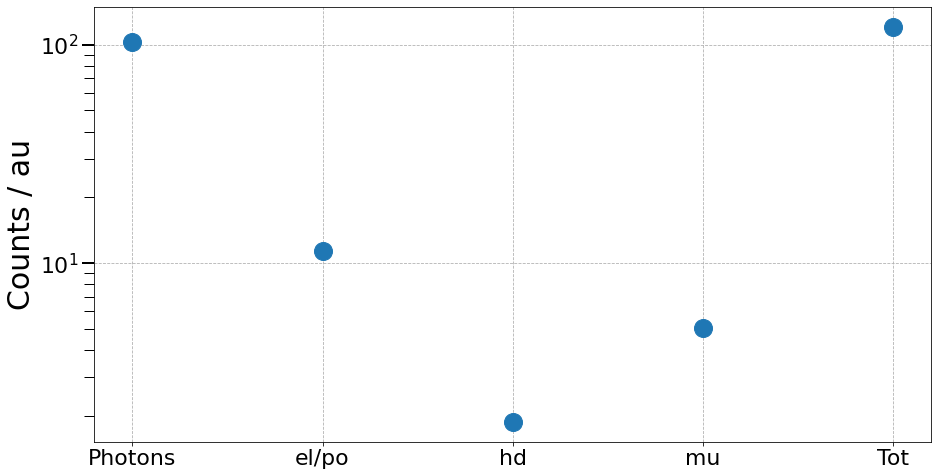

In [14]:
plt.figure(figsize=(15,8))

plt.plot(sec_name, sec_dist, "o", markersize=18)

#plt.xlabel("X0 / km a.s.l.", fontsize=30)
plt.ylabel("Counts / au", fontsize=30)

plt.yscale('log')

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.rcParams['ytick.major.size'] = 12
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['ytick.minor.width'] = 1

plt.grid(ls='--')

plt.show()

# Secondaries' Information

In [16]:
pos_x = []
pos_y = []

sec_px = []
sec_py = []
sec_pz = []

sec_t = [[] for i in range(100)]

file = bz2.open("mc-data/960014.sec.bz2", "rt")#reading file with primary information

cm2m = 0.01

for line in file:
    tmp = line.rstrip('\n').split(' ')
    if tmp[0] != "#" and int(tmp[7]) == 6:
        if int(tmp[0]) == 5 or int(tmp[0]) == 6:
        #if int(tmp[0]) == 1: # For photons
            pos_x.append( float(tmp[4]) * cm2m )
            pos_y.append( float(tmp[5]) * cm2m )
            print(np.sqrt(float(tmp[1])**2 + float(tmp[2])**2 + float(tmp[3])**2))
            sec_t[int(tmp[7])-1].append( float(tmp[6]) )

1.9562321963920846
0.17756954942472541
1.3489473992613499
7.954079158834164
0.19533211156308283
0.25234927183497086
3.000141598014875
1.8830793408802933
1.2700948255783897
1.0680673531030194
0.7886454409740793
0.8224001182958329
4.654488608872968
1.2428329960557412
0.4516161449851633
3.876286753601828


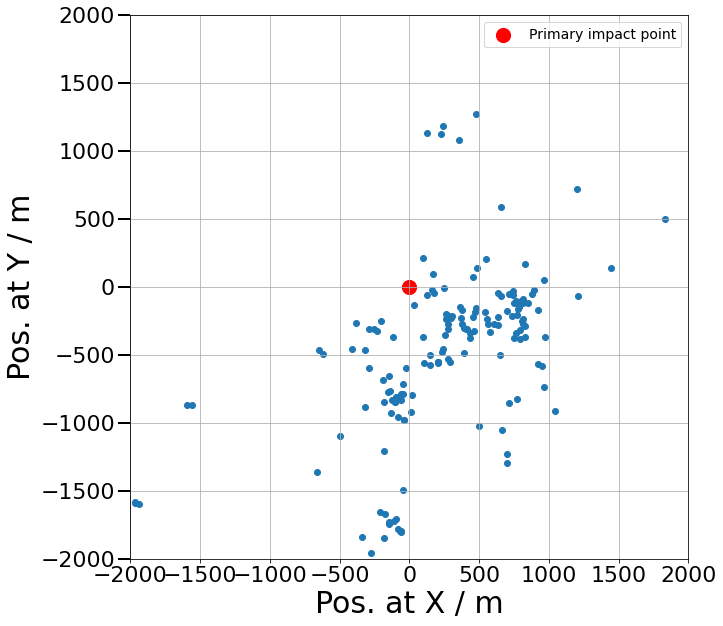

In [9]:
plt.figure(figsize=(10,10))

plt.scatter(pos_x, pos_y)
plt.scatter(0, 0, color="r", s=200, label="Primary impact point")

plt.legend(fontsize=14)

plt.xlabel("Pos. at X / m", fontsize=30)
plt.ylabel("Pos. at Y / m", fontsize=30)

dist = 2e3

plt.xlim(-dist, dist)
plt.ylim(-dist, dist)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.grid()

plt.show()

In [10]:
mu_cnt = np.zeros(12000, int)

for i in range(len(pos_y)):
    rd = np.sqrt(pos_x[i]*pos_x[i] + pos_y[i]*pos_y[i])
    mu_cnt[int(rd)] += 1

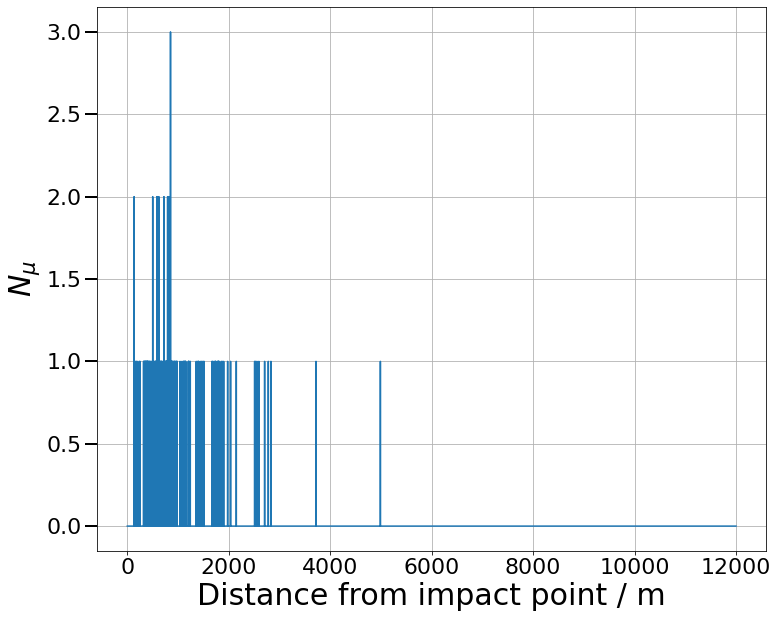

In [11]:
plt.figure(figsize=(12,10))

plt.plot(mu_cnt)

plt.xlabel("Distance from impact point / m", fontsize=30)
plt.ylabel("$N_{\mu}$", fontsize=30)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.grid()

plt.show()

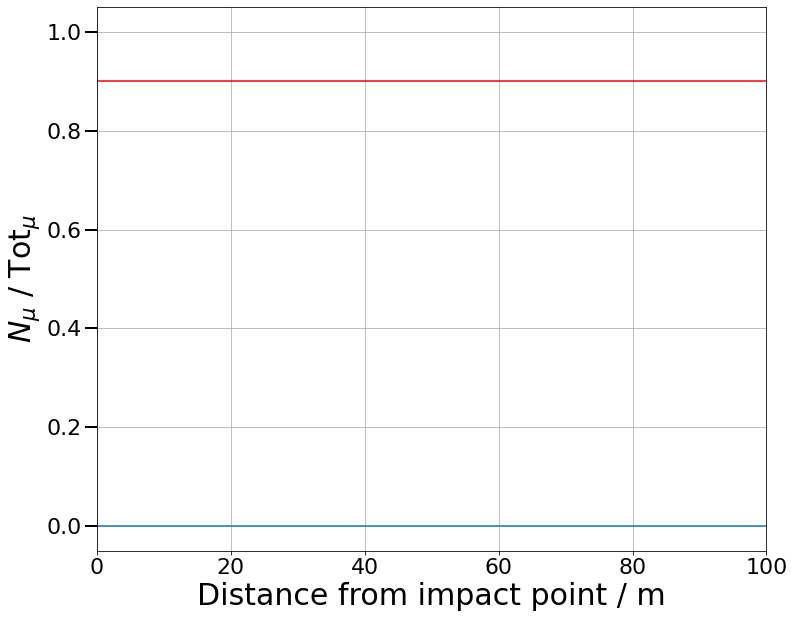

In [13]:
plt.figure(figsize=(12,10))

plt.plot(np.cumsum(mu_cnt)/np.sum(mu_cnt))
plt.axhline(y=0.9, color='r', linestyle='-')

plt.xlabel("Distance from impact point / m", fontsize=30)
plt.ylabel("$N_{\mu}$ / Tot${_\mu}$", fontsize=30)

plt.xlim(0,100)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.grid()

plt.show()

In [23]:
mu_rho = np.zeros(1500, float)
tmp = []

for i in range(1500):
    ar = np.pi*(i+1)**2
    tmp.append(ar)
    mu_rho[i] = np.cumsum(mu_cnt[0:(i+1)])[-1] / ar

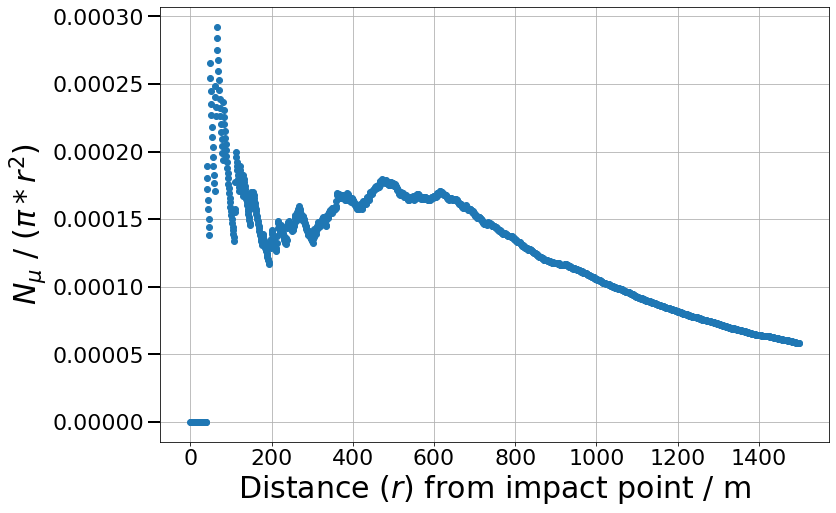

In [24]:
plt.figure(figsize=(12,8))

plt.plot(mu_rho, "o")

plt.xlabel("Distance ($r$) from impact point / m", fontsize=30)
plt.ylabel("$N_{\mu}$ / ($\pi*r^2$)", fontsize=30)

#plt.xlim(0,10)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.grid()

plt.show()

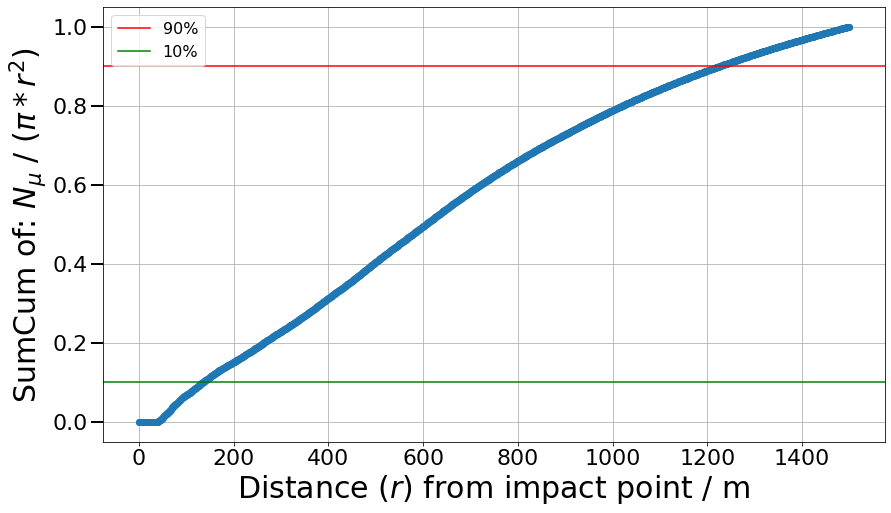

In [25]:
plt.figure(figsize=(14,8))

plt.plot(np.cumsum(mu_rho)/np.sum(mu_rho), "o")
plt.axhline(y=0.9, color='r', linestyle='-', label="90%")
plt.axhline(y=0.1, color='g', linestyle='-', label="10%")

plt.legend(fontsize=16)

plt.xlabel("Distance ($r$) from impact point / m", fontsize=30)
plt.ylabel("SumCum of: $N_{\mu}$ / ($\pi*r^2$)", fontsize=30)

#plt.xlim(0,10)
#plt.ylim(0,.2)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.grid()

plt.show()

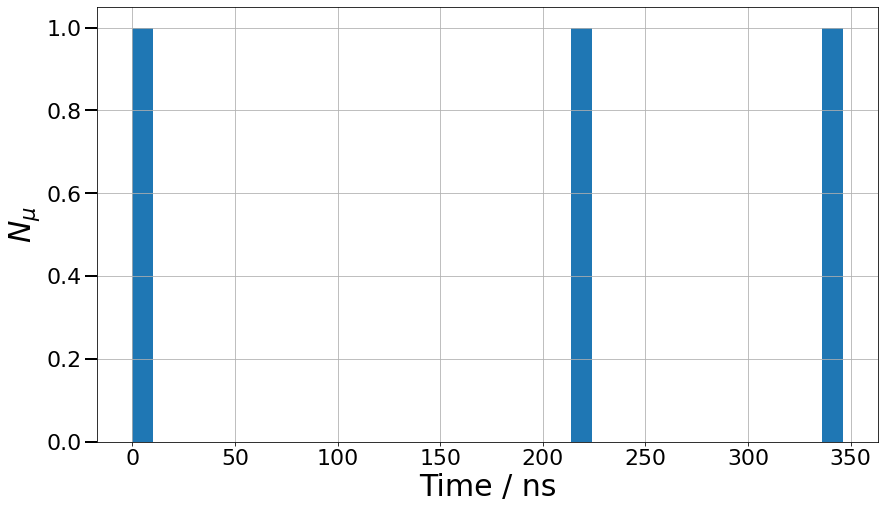

In [27]:
shw_t = np.array(sec_t[80])
bines = np.amax(shw_t) - np.amin(shw_t)

plt.figure(figsize=(14,8))

plt.hist(shw_t-np.amin(shw_t), bins=int(bines/10.))

plt.xlabel("Time / ns", fontsize=30)
plt.ylabel("$N_{\mu}$", fontsize=30)

#plt.xlim(0,400)
#plt.ylim(1e-3,)
#plt.yscale('log')

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.grid()

plt.show()